In [1]:
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
from scipy.optimize import fminbound
import matplotlib.ticker as ticker
from hoki.constants import BPASS_METALLICITIES, BPASS_NUM_METALLICITIES
from matplotlib.ticker import NullFormatter

In [2]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.linewidth'] = 2

In [3]:
NUM_COLORS = len(BPASS_METALLICITIES)
cm = plt.get_cmap('coolwarm')
cmap = plt.get_cmap("coolwarm", NUM_COLORS)
norm = mpl.colors.BoundaryNorm(np.arange(NUM_COLORS+1)+0.5,NUM_COLORS)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
BPASS_METALS = ["10$^{-5}$","10$^{-4}$","0.001", "0.002", "0.003", "0.004", "0.006", "0.008", "0.010", "0.014", "0.020", "0.030", "0.040" ]

In [4]:
millimillennium = h5py.File(f"/Users/dillon/Desktop/split_output_millimillennium.h5", "r")
TNG = h5py.File(f"/Users/dillon/Desktop/split_output_TNG.h5", "r")
EAGLE = h5py.File(f"/Users/dillon/Desktop/split_output_EAGLE.h5", "r")
MD = h5py.File(f"/Users/dillon/Desktop/split_output_MD.h5", "r")
empmodel = h5py.File(f"/Users/dillon/Desktop/split_output_empmodel.h5", "r")
harikane22 = h5py.File(f"/Users/dillon/Desktop/split_output_harikane22.h5", "r")

In [5]:
millimillennium = millimillennium['star_form_hist_millimillennium']
TNG = TNG['star_form_hist_TNG']
EAGLE = EAGLE['star_form_hist_EAGLE']
MD = MD['star_form_hist_MD']
empmodel = empmodel['star_form_hist_empmodel']
harikane22 = harikane22['star_form_hist_harikane22']

In [6]:
h = 0.6766
omega_M = 0.3111
omega_L = 0.6889

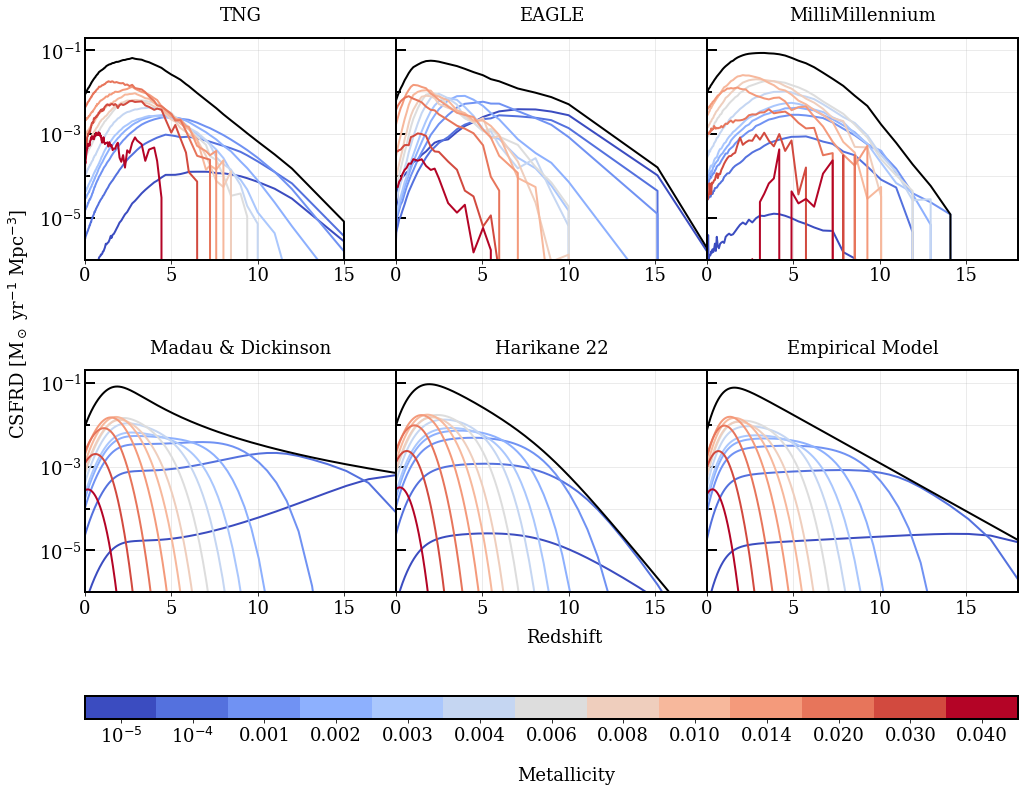

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharey=True)  


fig.subplots_adjust(wspace=0, hspace=0.5, right=0.9, left=0.18)

flat_axes = axes.flatten()


for ax, sfh_data, sfh_label in zip(flat_axes, [TNG, EAGLE, millimillennium, MD, harikane22, empmodel],
                                   ['TNG', 'EAGLE', 'MilliMillennium', 'Madau & Dickinson', 'Harikane 22', 'Empirical Model']):
    ax.set_ylim(9.999999e-7, 2e-1)
    ax.set_xlim(0, 18)

    for i, Z in enumerate(BPASS_METALLICITIES):
        ax.plot(sfh_data.attrs["redshift"], sfh_data[i], label=Z, color=cmap(i), lw=2)

    ax.plot(sfh_data.attrs["redshift"], np.sum(sfh_data, axis=0), label='total', color='black', lw=2)
    ax.set_yscale('log')

    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(10, numticks=4))
    ax.yaxis.set_minor_locator(mpl.ticker.LogLocator(10, numticks=8))

    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', left=True, right=False)
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', left=True, right=False)
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.grid(alpha=0.3)
    ax.grid(True, which="minor", axis="y", alpha=0.3)

    ax.text(0.5, 1.1, sfh_label, verticalalignment='center', horizontalalignment='center', transform=ax.transAxes)


fig.text(0.52, 0.18, "Redshift")
fig.text(0.5132, 0.02, "Metallicity")
fig.text(0.12, 0.55, r"CSFRD [M$_\odot$ yr$^{-1}$ Mpc$^{-3}$]", verticalalignment='center', rotation=90)



cbar = fig.colorbar(sm, ticks=np.arange(NUM_COLORS+1), ax=flat_axes, pad=0, aspect=40, orientation='horizontal')
cbar.ax.set_xticklabels(BPASS_METALS)  
cbar.ax.get_xaxis().labelpad = 30
#cbar.ax.set_xlabel('Metallicity')
cbar_bottom_space = 0.12  
cbar.ax.set_position([cbar.ax.get_position().x0, cbar.ax.get_position().y0 - cbar_bottom_space,
                      cbar.ax.get_position().width, cbar.ax.get_position().height])


plt.savefig('/Users/dillon/Desktop/Met Evo Plot')

plt.show()


